# Customer Retention Cohort Analysis and A/B Testing

Created by: Huaqing Ji

1. Introduction
- This project is based on the transaction data for a retail store. The source data, which is from Kaggle, contains three datasets: transaction, customer, and product hierarchy. The project aims to perform exploratory data analysis, cohort analysis, and A/B testing on the source data, with the customer retention as the KPI metric in particular.  Various data cleaning, transformation, integration, wrangling, aggregation, and visualization are also implemented.


2. Table of Contents
- **[1. Import Data](#1)**
    - [1.1. Import Customer Data](#1.1)
    - [1.2. Import Product Hierarchy Data](#1.2)
    - [1.3. Import Transaction Data](#1.3)
- **[2. Data Cleaning and Transformation](#2)**
    - [2.1. Data Cleaning for Customer Data](#2.1)
        - [2.1.1. Check and Remove Missing Values](#2.1.1)
        - [2.1.2. Check and Remove Duplicated Records](#2.1.2)
        - [2.1.3. Convert Data Types](#2.1.3)
    - [2.2. Data Cleaning for Product Hierarchy Data](#2.2)
        - [2.2.1. Check and Remove Missing Values](#2.2.1)
        - [2.2.2. Check and Remove Duplicated Records](#2.2.2)
    - [2.3. Data Cleaning for Transaction Data](#2.3)
        - [2.3.1. Check and Remove Missing Values](#2.3.1)
        - [2.3.2. Check and Remove Duplicated Records](#2.3.2)
        - [2.3.3. Check and Remove Transactions with Nonpositive Quantity](#2.3.3)
        - [2.3.4. Convert Data Types](#2.3.4)
- **[3. Data Integration](#3)**
- **[4. Exploratory Data Analysis (EDA)](#4)**
    - [4.1. Explore Numerical Data](#4.1)
        - [4.1.1. Data Location and Variability](#4.1.1)
        - [4.1.2. Data Distribution](#4.1.2)
    - [4.2. Explore Categorical Data](#4.2)
        - [4.2.1. Pie Plot for Categories](#4.2.1)
        - [4.2.2. Bar Plot for Categories](#4.2.2)
    - [4.3. Explore Multiple Variables and Facet Grids](#4.3)
- **[5. Customer Retention Cohort Analysis](#5)**
    - [5.1. Define the Time Interval for Retention](#5.1)
    - [5.2. Data Wrangling and Aggregation for Cohort Matrix](#5.2)
    - [5.3. Cohort Analysis and Heatmap Visualization](#5.3)
    - [5.4. Conclusion](#5.4)
- **[6. Customer Retention A/B Testing](#6)**
    - [6.1. Data Preparation and Analysis](#6.1)
        - [6.1.1. Filter Data](#6.1.1)
        - [6.1.2. Calculate KPI Metric](#6.1.2)
        - [6.1.3. Retrospective Analysis](#6.1.3)
    - [6.2. A/B Testing](#6.2)
        - [6.2.1. Define Experiment Group and Control Group](#6.2.1)
        - [6.2.2. Hypothesis Testing - Parametric Method - Self Defined Z Test](#6.2.2)
        - [6.2.3. Hypothesis Testing - Parametric Method - Statistical Library Z Test](#6.2.3)
        - [6.2.4. Hypothesis Testing - Simulation Method](#6.2.4)
    - [6.3. Conclusion](#6.3)


3. Reference
- https://www.kaggle.com/darpan25bajaj/retail-case-study-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
import statsmodels.api as sm

<a id='1'></a>
# 1. Import Data

<a id='1.1'></a>
### 1.1. Import Customer Data

In [2]:
customer_source = pd.read_csv('customer.csv')
customer_source.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


<a id='1.2'></a>
### 1.2. Import Product Hierarchy Data

In [3]:
prod_cat_info_source = pd.read_csv('prod_cat_info.csv')
prod_cat_info_source.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


<a id='1.3'></a>
### 1.3. Import Transaction Data

In [4]:
transactions_source = pd.read_csv('transactions.csv')
transactions_source.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


<a id='2'></a>
# 2. Data Cleaning and Transformation

<a id='2.1'></a>
### 2.1. Data Cleaning for Customer Data

In [5]:
customer = customer_source.copy()
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_Id  5647 non-null   int64  
 1   DOB          5647 non-null   object 
 2   Gender       5645 non-null   object 
 3   city_code    5645 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 176.6+ KB


<a id='2.1.1'></a>
2.1.1. Check and Remove Missing Values

In [6]:
# there are missing values
print(len(customer[customer.isnull().any(axis=1)]))
# remove the missing values
customer = customer.dropna()

4


<a id='2.1.2'></a>
2.1.2. Check and Remove Duplicated Records
- each customer_id only has one record

In [7]:
# There are no duplicated records with same customer_id in the customer data
print(len(customer[customer.duplicated(subset=['customer_Id'], keep=False)]))

0


<a id='2.1.3'></a>
2.1.3. Convert Data Types

In [8]:
customer['DOB'] = pd.to_datetime(customer['DOB'])

In [9]:
print('Current length for customer data: ', len(customer))

Current length for customer data:  5643


<a id='2.2'></a>
### 2.2. Data Cleaning for Product Hierarchy Data

In [10]:
prod_cat_info = prod_cat_info_source.copy()
prod_cat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   prod_cat_code      23 non-null     int64 
 1   prod_cat           23 non-null     object
 2   prod_sub_cat_code  23 non-null     int64 
 3   prod_subcat        23 non-null     object
dtypes: int64(2), object(2)
memory usage: 864.0+ bytes


<a id='2.2.1'></a>
2.2.1. Check and Remove Missing Values

In [11]:
# there are no missing values
print(len(prod_cat_info[prod_cat_info.isnull().any(axis=1)]))

0


<a id='2.2.2'></a>
2.2.2. Check and Remove Duplicated Records
- each combination of product category and sub_category only has one record

In [12]:
# there are no duplciated records with same product category and sub_category
print(len(prod_cat_info[prod_cat_info.duplicated(
    subset=['prod_cat_code', 'prod_sub_cat_code'], keep=False)]))

0


In [13]:
print('Current length for product category data: ', len(prod_cat_info))

Current length for product category data:  23


<a id='2.3'></a>
### 2.3. Data Cleaning for Transaction Data

In [14]:
transactions = transactions_source.copy()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


<a id='2.3.1'></a>
2.3.1. Check and Remove Missing Values

In [15]:
# there are no missing values
print(len(transactions[transactions.isnull().any(axis=1)]))

0


<a id='2.3.2'></a>
2.3.2. Check and Remove Duplicated Records
- each transaction_id only has one record

In [16]:
# there are duplicated records with all same columns
print(len(transactions[transactions.duplicated()]))
# remove duplicated records with all same columns
transactions = transactions.drop_duplicates()

13


In [17]:
# there are still duplicated records with same tranaction_id due to the return of items
df = transactions[transactions.duplicated(
    subset=['transaction_id'], keep=False)].sort_values('transaction_id')
print(len(df))
df.head()

4219


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
19074,87125650,268666,9/8/2011,1,4,-5,-359,188.475,-1983.475,e-Shop
19148,87125650,268666,5/8/2011,1,4,5,359,188.475,1983.475,e-Shop
18296,95570369,269136,16-09-2011,12,6,1,376,39.480,415.480,e-Shop
18043,95570369,269136,26-09-2011,12,6,-1,-376,39.480,-415.480,e-Shop
13880,156697409,268633,17-04-2012,12,5,5,1139,597.975,6292.975,e-Shop


In [18]:
# remove duplicated transactions due to the return of the items
# this transaction didn't make any revenue, so don't consider it
# so that each transaction id would have only one record
transactions = transactions.drop_duplicates(
    subset=['transaction_id'], keep=False)

<a id='2.3.3'></a>
2.3.3. Check and Remove Transactions with Nonpositive Quantity

In [19]:
# remove the transaction for which the quantity is nonpositive
print(len(transactions[transactions.Qty <= 0]))
transactions = transactions[transactions.Qty > 0]

2


<a id='2.3.4'></a>
2.3.4. Convert Data Types

In [20]:
transactions['tran_date'] = pd.to_datetime(transactions['tran_date'])

In [21]:
print('Current length for transaction data: ', len(transactions))

Current length for transaction data:  18819


<a id='3'></a>
# 3. Data Integration
- merge three datasets to one retail dataset

In [22]:
retail = pd.merge(transactions, customer, left_on = 'cust_id',
                  right_on='customer_Id', how='inner')
retail = pd.merge(retail, prod_cat_info,
                  left_on=['prod_cat_code', 'prod_subcat_code'],
                  right_on=['prod_cat_code', 'prod_sub_cat_code'],
                  how='inner')
# drop the columns that are not useful
retail = retail.drop(['customer_Id', 'prod_sub_cat_code'], axis=1)
retail.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,1986-10-13,M,1.0,Home and kitchen,Tools
1,23886386288,267750,2013-10-03,12,6,1,1418,148.890,1566.890,TeleShop,1986-10-13,M,1.0,Home and kitchen,Tools
2,89539931184,268509,2013-11-18,12,6,3,1083,341.145,3590.145,e-Shop,1989-08-17,M,10.0,Home and kitchen,Tools
3,32130400636,269772,2014-02-19,12,6,3,229,72.135,759.135,e-Shop,1981-05-25,F,9.0,Home and kitchen,Tools
4,31407833077,268229,2012-12-27,12,6,4,928,389.760,4101.760,Flagship store,1989-01-03,F,3.0,Home and kitchen,Tools


In [23]:
# right now, each transaction_id only has one record
retail.transaction_id.nunique()

18804

In [24]:
print('Current length for retail data: ', len(retail))

Current length for retail data:  18804


<a id='4'></a>
## 4. Exploratory Data Analysis (EDA)

<a id='4.1'></a>
### 4.1. Explore Numerical Data

<a id='4.1.1'></a>
4.1.1. Data Location and Variability

In [25]:
# explore the total amount of each transaction
# since the total amount is directly related to the revenue
retail_total_amt = retail['total_amt']
retail_total_amt.describe()

count    18804.000000
mean      2598.799339
std       1958.393665
min         77.350000
25%       1025.440000
50%       2079.610000
75%       3805.620000
max       8287.500000
Name: total_amt, dtype: float64

<a id='4.1.2'></a>
4.1.2. Data Distribution

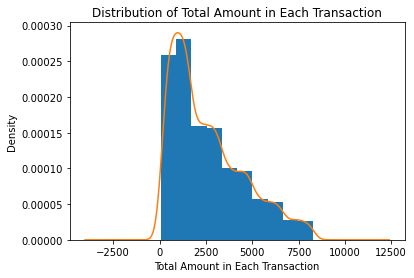

In [26]:
ax=retail_total_amt.plot.hist(density=True)
retail_total_amt.plot.density(ax=ax)
ax.set_xlabel('Total Amount in Each Transaction')
plt.title('Distribution of Total Amount in Each Transaction')
plt.show()

<a id='4.2'></a>
### 4.2. Explore Categorical Data

<a id='4.2.1'></a>
4.2.1. Pie Plot for Categories

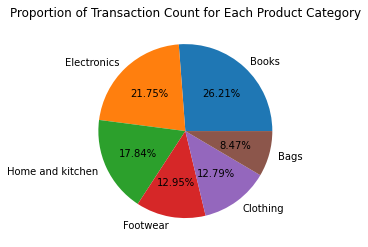

In [27]:
# draw pie plot for transaction count in each product category
# based on the count of transactions in each product category
retail_prod_cat = retail['prod_cat'].value_counts()
plt.pie(x=list(retail_prod_cat),
        labels=retail_prod_cat.index,
        autopct='%1.2f%%')
plt.title('Proportion of Transaction Count for Each Product Category')
plt.show()

<a id='4.2.2'></a>
4.2.2. Bar Plot for Categories

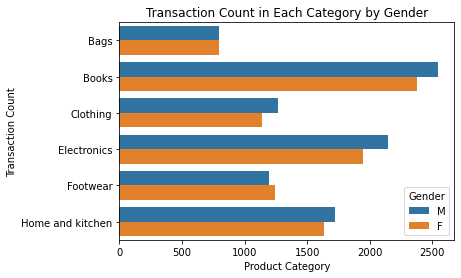

In [28]:
# draw bar plot for transaction count in each product category by gender
retail_prod_cat_gender = retail.groupby('prod_cat').Gender.value_counts().to_frame(
    'count').reset_index()
sns.barplot(x='count', y='prod_cat', hue='Gender',
            data=retail_prod_cat_gender, orient='h')
plt.title('Transaction Count in Each Category by Gender')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.show()

<a id='4.3'></a>
### 4.3. Explore Multiple Variables and Facet Grids

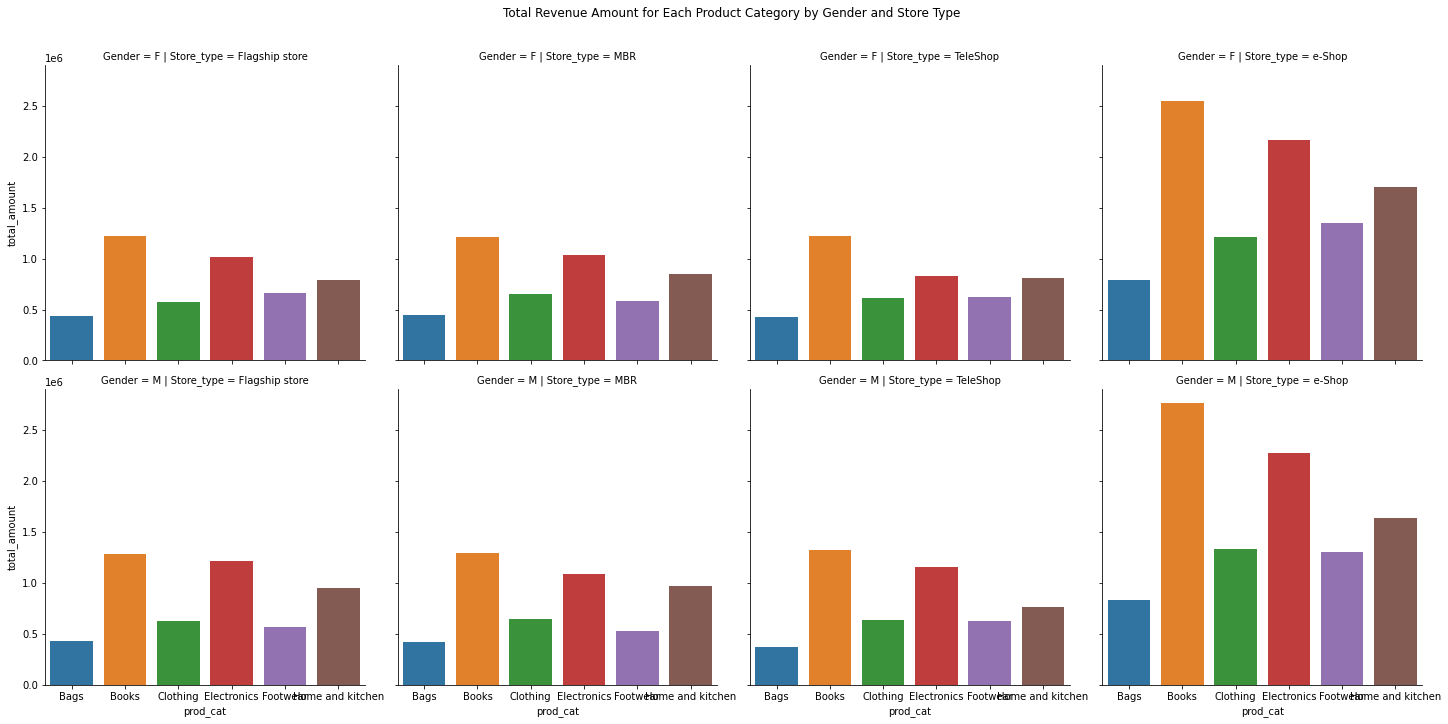

In [29]:
# calculate the total revenue amount for each group
retail_total_amt_group = retail.groupby(['Gender', 'Store_type', 'prod_cat']
                                       ).total_amt.sum().to_frame('total_amount').reset_index()

# draw the facet grids
facet_grids=sns.catplot(x='prod_cat', y='total_amount',
            row='Gender', col='Store_type',
            kind='bar',
            data=retail_total_amt_group)
facet_grids.fig.subplots_adjust(top=0.9)
facet_grids.fig.suptitle('Total Revenue Amount for Each Product Category by Gender and Store Type')
plt.show()

<a id='5'></a>
# 5. Customer Retention Cohort Analysis

1. retention
- critical event: complete a transaction
- type: bracket, bounded
- time interval: one year 

2. cohort
- a group of customers who completed the first transaction in the same year

<a id='5.1'></a>
### 5.1. Define the Time Interval for Retention

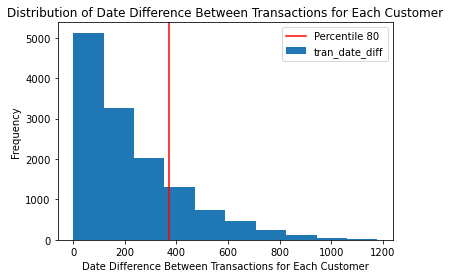

In [30]:
# calculate the time difference between transactions for each customer
# determine the time interval (use 80 percentile)

retail_retention = retail[['cust_id', 'transaction_id', 'tran_date']]

# calculate the date differences of transactions for each customer
def date_diff(group):
    group.sort_values('tran_date', inplace=True)
    group['prev_tran_date'] = group['tran_date'].shift()
    group['tran_date_diff'] = (group['tran_date'] - group['prev_tran_date']).dt.days
    return group.dropna()
    
retail_retention = retail_retention.groupby('cust_id').apply(
    date_diff).reset_index(drop=True)

# plot the distribution of the date differences of transactions for each customer
retail_retention['tran_date_diff'].plot.hist()
plt.title('Distribution of Date Difference Between Transactions for Each Customer')
plt.xlabel('Date Difference Between Transactions for Each Customer')
plt.ylabel('Frequency')

percentile_80 = np.percentile(retail_retention['tran_date_diff'], 80)
plt.axvline(x=percentile_80, color='r', label='Percentile 80')
plt.legend()

In [31]:
print('The proper time interval for retention: ', percentile_80)

The proper time interval for retention:  373.0


**Conclusion**
- One year would be a proper retention time interval for this case.

<a id='5.2'></a>
### 5.2. Data Wrangling and Aggregation for Cohort Matrix

In [32]:
# add transaction year for each record
retail_cohort = pd.DataFrame()

retail_cohort['cust_id'] = retail['cust_id']
retail_cohort['tran_date'] = retail['tran_date']
retail_cohort['tran_year'] = retail['tran_date'].dt.to_period('Y')
retail_cohort.drop_duplicates(subset=['cust_id', 'tran_year'], inplace=True)

# add cohort for each record, which is the first year when each customer completed a transaction
retail_cohort['cohort'] = retail_cohort.groupby('cust_id').tran_year.transform(min)
retail_cohort.sort_values(['cust_id', 'tran_year'], inplace=True)

# get period number that measures how many years are between transaction year and cohort year
retail_cohort['period_number'] = (retail_cohort['tran_year'] - retail_cohort['cohort']
                                 ).apply(lambda x: x.n)

print(len(retail_cohort))  
retail_cohort.head()

11869


,cust_id,tran_date,tran_year,cohort,period_number
13678,266783,2012-10-21,2012,2012,0
13677,266783,2013-02-20,2013,2012,1
8081,266784,2012-09-09,2012,2012,0
16745,266785,2011-10-24,2011,2011,0
2973,266785,2012-01-02,2012,2011,1


In [33]:
# calculate the count of customers for each cohort and each period number
retail_cohort = retail_cohort.groupby(['cohort', 'period_number']
                                     ).size().to_frame('customer_number').reset_index()

print(len(retail_cohort))
retail_cohort.head()

10


,cohort,period_number,customer_number
0,2011,0,3591
1,2011,1,2345
2,2011,2,2392
3,2011,3,507
4,2012,0,1382


In [34]:
# get the cohort matrix, with proportion of customer counts in each cohort
retail_cohort_pivot = retail_cohort.pivot('cohort', 'period_number', 'customer_number')
retail_cohort_size = retail_cohort_pivot.max(axis=1)
retail_cohort_matrix = retail_cohort_pivot.divide(retail_cohort_size, axis=0)

retail_cohort_matrix

period_number,0,1,2,3
cohort,,,,
2011,1.0,0.653021,0.666110,0.141186
2012,1.0,0.664978,0.141823,NaN
2013,1.0,0.162037,NaN,NaN
2014,1.0,NaN,NaN,NaN


<a id='5.3'></a>
### 5.3. Cohort Analysis and Heatmap Visualization

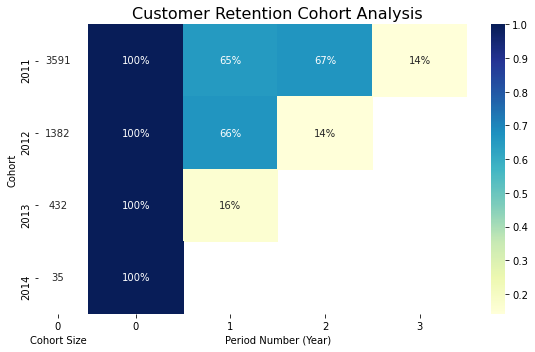

In [35]:
# set up plots
fig, ax = plt.subplots(1, 2, figsize=(8, 5), gridspec_kw={'width_ratios': [1, 12]})  

# plot the customer retention cohort matrix
sns.heatmap(retail_cohort_matrix, annot=True, cmap='YlGnBu', fmt='.0%', ax=ax[1])
ax[1].set_title('Customer Retention Cohort Analysis', fontsize=16)
ax[1].set(xlabel='Period Number (Year)')
ax[1].get_yaxis().set_visible(False)

# plot the cohort size
sns.heatmap(retail_cohort_size.to_frame(), annot=True,
            cmap=mcolors.ListedColormap(['white']), fmt='g', ax=ax[0], cbar=False)
ax[0].set(xlabel = 'Cohort Size', ylabel='Cohort')

fig.tight_layout()

<a id='5.4'></a>
### 5.4. Conclusion
- From 2011 to 2014, the cohort size is decreasing from 3591 to 35. Since the cohort size defines the count of new customers (who complete the first transaction in this year), we should pay attention to this trend and try to find what would be the reason for this decreasing trend.
- After the initial year, around 66% of the customers have one-year retention, which means they would place at least one transaction in the next year. And from the first cohort, it seems that the two-year retention rate is still around 66%. So that we should try our best to keep the new customers in the first year, it seems that after the first year the retention could be steady.
- But the retention rate in each cohort for 2014 has decreased a lot, and we can also notice that the cohort size for 2014 is really low (35) too. There must be something related to 2014 that makes the retail result this bad, and we should do more research to find it out.
- Also, there are only 4 cohort years in this analysis. Getting data from more years might be helpful for the research

<a id='6'></a>
# 6. Customer Retention A/B Testing

1. data
- all transactions in the product category 'Electronics'
2. KPI metric
- one-year retention
3. groups
- by gender
- male group (M) and female group (F)

### 6.1. Data Preparation and Analysis

<a id='6.1.1'></a>
6.1.1. Filter Data

In [36]:
# only get the transactions in the prouduct category 'Electronics'
retail_group = retail[retail.prod_cat == 'Electronics']
print(len(retail_group))

4089


<a id='6.1.2'></a>
6.1.2. Calculate KPI Metric
- one-year retention 

In [37]:
# get the required data
retail_customer = pd.DataFrame()

retail_customer['cust_id'] = retail_group['cust_id']
retail_customer['gender'] = retail_group['Gender']
retail_customer['tran_date'] = retail_group['tran_date']
retail_customer['tran_year'] = retail_customer['tran_date'].dt.to_period('Y')
retail_customer.drop_duplicates(subset=['cust_id', 'tran_year'], inplace=True)

retail_customer['tran_first_year'] = retail_customer.groupby('cust_id').tran_year.transform(min)
retail_customer['period_number'] = (retail_customer['tran_year'] - retail_customer['tran_first_year']
                                 ).apply(lambda x: x.n)
retail_customer.sort_values(['cust_id', 'tran_year'], inplace=True)

# remvoe the customers whose first transaction is within the last year of the data
# so that all customers would have the chance to complete the transaction in a whole year
max_tran_year = max(retail_customer.tran_first_year)
retail_customer = retail_customer[(retail_customer.tran_first_year != max_tran_year)]

print(len(retail_customer))
retail_customer.head()

3608


,cust_id,gender,tran_date,tran_year,tran_first_year,period_number
18657,266784,F,2012-04-12,2012,2012,0
9890,266794,F,2012-11-27,2012,2012,0
14209,266799,F,2012-11-03,2012,2012,0
14365,266804,M,2013-08-06,2013,2013,0
10018,266805,F,2013-12-27,2013,2013,0


In [38]:
# define the first year retention
# 1 means the customers complete a transaction again in the first year after their first transaction
# 0 means the customers didn't complete another transaction in the first year after their first transaction

def add_retention(group):
    return len(group[group.period_number == 1])

retail_first_year_retention = retail_customer.groupby(['cust_id', 'gender']).apply(
    add_retention).to_frame('first_year_retention').reset_index()

print(len(retail_first_year_retention))
retail_first_year_retention.head()

2839


,cust_id,gender,first_year_retention
0,266784,F,0
1,266794,F,0
2,266799,F,0
3,266804,M,0
4,266805,F,0


<a id='6.1.3'></a>
6.1.3. Retrospective Analysis

In [39]:
retail_first_year_retention.groupby('gender').first_year_retention.mean()

gender
F    0.141606
M    0.174949
Name: first_year_retention, dtype: float64

**Conclusion**
- In the electronics category, the male group has higher one-year retention rate than the female group
- But we cannot say that this result is statistically significant

<a id='6.2'></a>
### 6.2. A/B Testing

1. metric
- one-year retention (1: yes, 0: no)
2. group
- by gender
- experiment group: male group
- control group: female group
3. hypothesis
- null hypothesis: no difference between one-year retention rate of these two groups
- alternative hypothesis: experiment group has higher one-year retention rate than control group
- significance level: 5%
- confidence level: 95%

<a id='6.2.1'></a>
6.2.1. Define Experiment Group and Control Group

In [40]:
experiment_group = retail_first_year_retention[
    retail_first_year_retention.gender == 'M'].first_year_retention
experiment_n = len(experiment_group)
print('size of experiment group: ', experiment_n)

control_group = retail_first_year_retention[
    retail_first_year_retention.gender == 'F'].first_year_retention
control_n = len(control_group)
print('size of control group: ', control_n)

size of experiment group:  1469
size of control group:  1370


<a id='6.2.2'></a>
6.2.2. Hypothesis Testing - Parametric Method - Self Defined Z Test

In [41]:
def proportion_z_test(experiment_group, control_group, significance_level = 0.05):
    """
    This function performs the A/B testing (z test) for two groups.
    
    Assume that sample in experiment group has bernoulli distribution (success rate: p_exp),
      and sample in control group has bernoulli distribution (success rate: p_cont).
      
    Null hypothesis H_0: p_exp = p_cont
    Alternative hypothesis H_1: p_exp > p_cont
      
    
    experiment_group: sample data in the experiment group
    control_group: sample data in the control group
    significance_level: significance level of the hypothesis testing
    
    Returns: one-tail p-value
    """
    experiment_n = len(experiment_group)
    control_n = len(control_group)
    
    p_pool = (experiment_group.sum() + control_group.sum())/(experiment_n + control_n)
    SE_pool = np.sqrt(p_pool * (1 - p_pool) * (1 / experiment_n + 1 / control_n))
    z = (experiment_group.mean() - control_group.mean()) / SE_pool
    
    p_val = 1 - norm.cdf(z)
    if p_val < significance_level:
        print('Reject H_0: the experiment group has higher successful rate (p) than the control group')
    else:
        print('Fail to reject H_0: the difference between two groups is not statistically significant')

    return np.round(p_val, 4)
    
p_value = proportion_z_test(experiment_group, control_group)
print('one tail p-value: ', p_value)

Reject H_0: the experiment group has higher successful rate (p) than the control group
one tail p-value:  0.0076


<a id='6.2.3'></a>
6.2.3. Hypothesis Testing - Parametric Method - Statistical Library Z Test

In [42]:
experiment_n = len(experiment_group)
experiment_success_n = len(experiment_group[experiment_group == 1])

control_n = len(control_group)
control_success_n = len(control_group[control_group == 1])

z, p_val = sm.stats.proportions_ztest([experiment_success_n, control_success_n], 
                                          [experiment_n, control_n], alternative='larger')

print('one tail p-value: ', np.round(p_val, 4))

one tail p-value:  0.0076


<a id='6.2.4'></a>
6.2.4. Hypothesis Testing - Simulation Method

In [43]:
# under null hypothesis, there is no difference between first year retention rate of two groups
p_pool = retail_first_year_retention.first_year_retention.mean()

one tail p-value:  0.00751


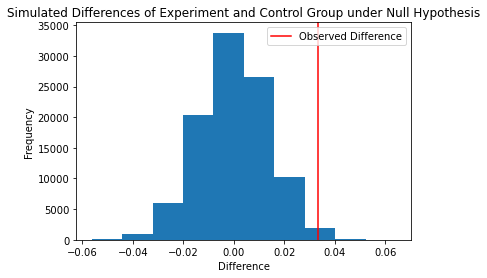

In [44]:
# simulate trasactions for experiment and control group
diff_simulation = []

for i in range(100000):
    experiment_simulation = np.random.binomial(1, p_pool, experiment_n)
    control_simulation = np.random.binomial(1, p_pool, control_n)
    diff_simulation.append(experiment_simulation.mean() - control_simulation.mean())
    
diff_simulation = np.array(diff_simulation)
plt.hist(diff_simulation)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Simulated Differences of Experiment and Control Group under Null Hypothesis')

diff_observed = experiment_group.mean() - control_group.mean()
plt.axvline(x=diff_observed, color='r', label='Observed Difference')
plt.legend()

print('one tail p-value: ', np.mean(diff_simulation > diff_observed))

<a id='6.3'></a>
### 6.3. Conclusion
- Reject null hypothesis, since one tail p-value is lower than significance level 5%
- For the specified significance level, the observed difference between two groups is not within the proper range of change variation
- This suggests that in the electronics category, the male group has higher one-year retention rate than the female group, and this result is statistically significant